In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

path = '/home/ghosnp/project/fix_space/origin/carla_dataset_tools/raw_data/all_data.csv'
df = pd.read_csv(path)

X_train = np.array([df['x'], df['y']]).T
y_train_o = np.array(df['z'])

X_train, X_test, y_train, y_test = train_test_split(X_train,y_train_o, test_size=0.2, random_state=0)

poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

def evaluate_regression(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, rmse, mae, r2

X_train_x = np.array(df['x'])
X_train_y = np.array(df['y'])

X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(X_train_x,y_train_o, test_size=0.2, random_state=0)

X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(X_train_y,y_train_o, test_size=0.2, random_state=0)


<Axes: xlabel='y', ylabel='z'>

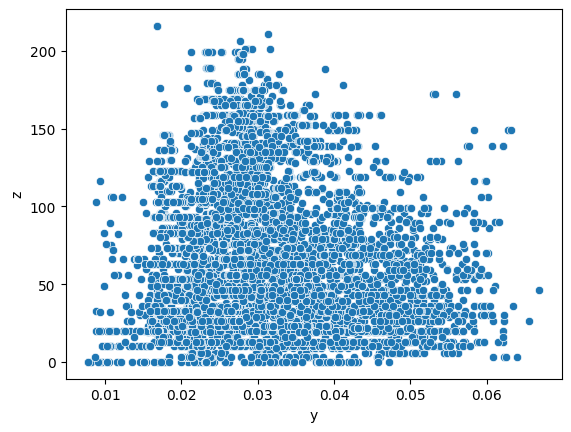

In [2]:
import seaborn as sns
# display the connection between x and z, y and z
sns.scatterplot(x=df['y'], y=df['z'])

In [3]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)
rfr_mse, rfr_rmse, rfr_mae, rfr_r2 = evaluate_regression(y_test, y_pred)
print('[RFR]')
print('mse: ', rfr_mse)
print('rmse: ', rfr_rmse)
print('mae: ', rfr_mae)
print('r2: ', rfr_r2)

RFR_poly = RandomForestRegressor()
RFR_poly.fit(X_train_poly,y_train)
y_pred_poly = RFR_poly.predict(X_test_poly)
rfr_poly_mse, rfr_poly_rmse, rfr_poly_mae, rfr_poly_r2 = evaluate_regression(y_test, y_pred_poly)
print('[RFR_poly]')
print('mse: ', rfr_poly_mse)
print('rmse: ', rfr_poly_rmse)
print('mae: ', rfr_poly_mae)
print('r2: ', rfr_poly_r2)

[RFR]
mse:  1383.7017978529605
rmse:  37.19814239788004
mae:  25.614072869225765
r2:  0.4105690274624024
[RFR_poly]
mse:  1330.7586523747561
rmse:  36.47956485999739
mae:  25.203832140533503
r2:  0.43312181287963547


In [4]:
from sklearn.svm import SVR

Svr = SVR()
Svr.fit(X_train,y_train)
y_pred = Svr.predict(X_test)
svr_mse, svr_rmse, svr_mae, svr_r2 = evaluate_regression(y_test, y_pred)
print('[SVR]')
print('mse: ', svr_mse)
print('rmse: ', svr_rmse)
print('mae: ', svr_mae)
print('r2: ', svr_r2)

Svr_poly = SVR()
Svr_poly.fit(X_train_poly,y_train)
y_pred_poly = Svr_poly.predict(X_test_poly)
svr_poly_mse, svr_poly_rmse, svr_poly_mae, svr_poly_r2 = evaluate_regression(y_test, y_pred_poly)
print('[SVR_poly]')
print('mse: ', svr_poly_mse)
print('rmse: ', svr_poly_rmse)
print('mae: ', svr_poly_mae)
print('r2: ', svr_poly_r2)

[SVR]
mse:  2265.8752079313226
rmse:  47.60121015196276
mae:  39.26603659104603
r2:  0.03477972672135221
[SVR_poly]
mse:  2251.5915778599137
rmse:  47.45093864045172
mae:  39.09519431816466
r2:  0.04086428480852222


In [5]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
lr_mse, lr_rmse, lr_mae, lr_r2 = evaluate_regression(y_test, y_pred)
print('[LR]')
print('mse: ', lr_mse)
print('rmse: ', lr_rmse)
print('mae: ', lr_mae)
print('r2: ', lr_r2)

LR_poly = LinearRegression()
LR_poly.fit(X_train_poly,y_train)
y_pred_poly = LR_poly.predict(X_test_poly)
lr_poly_mse, lr_poly_rmse, lr_poly_mae, lr_poly_r2 = evaluate_regression(y_test, y_pred_poly)
print('[LR_poly]')
print('mse: ', lr_poly_mse)
print('rmse: ', lr_poly_rmse)
print('mae: ', lr_poly_mae)
print('r2: ', lr_poly_r2)

[LR]
mse:  2198.305982565769
rmse:  46.8860958341145
mae:  39.7285198965276
r2:  0.06356294741430002
[LR_poly]
mse:  1918.5047952295035
rmse:  43.80073966532419
mae:  36.34127250570106
r2:  0.18275299705121972


In [6]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
# 'squared_error', 'huber', 'quantile', 'absolute_error'
GBR.fit(X_train,y_train)
y_pred = GBR.predict(X_test)
gbr_mse, gbr_rmse, gbr_mae, gbr_r2 = evaluate_regression(y_test, y_pred)
print('[GBR]')
print('mse: ', gbr_mse)
print('rmse: ', gbr_rmse)
print('mae: ', gbr_mae)
print('r2: ', gbr_r2)

GBR_poly = GradientBoostingRegressor()
GBR_poly.fit(X_train_poly,y_train)
y_pred_poly = GBR_poly.predict(X_test_poly)
gbr_poly_mse, gbr_poly_rmse, gbr_poly_mae, gbr_poly_r2 = evaluate_regression(y_test, y_pred_poly)
print('[GBR_poly]')
print('mse: ', gbr_poly_mse)
print('rmse: ', gbr_poly_rmse)
print('mae: ', gbr_poly_mae)
print('r2: ', gbr_poly_r2)

[GBR]
mse:  1562.7010573078078
rmse:  39.53101386642908
mae:  32.198030575255736
r2:  0.33431870550163534
[GBR_poly]
mse:  1422.937466177653
rmse:  37.72184335604045
mae:  30.340838855131103
r2:  0.39385536981255964


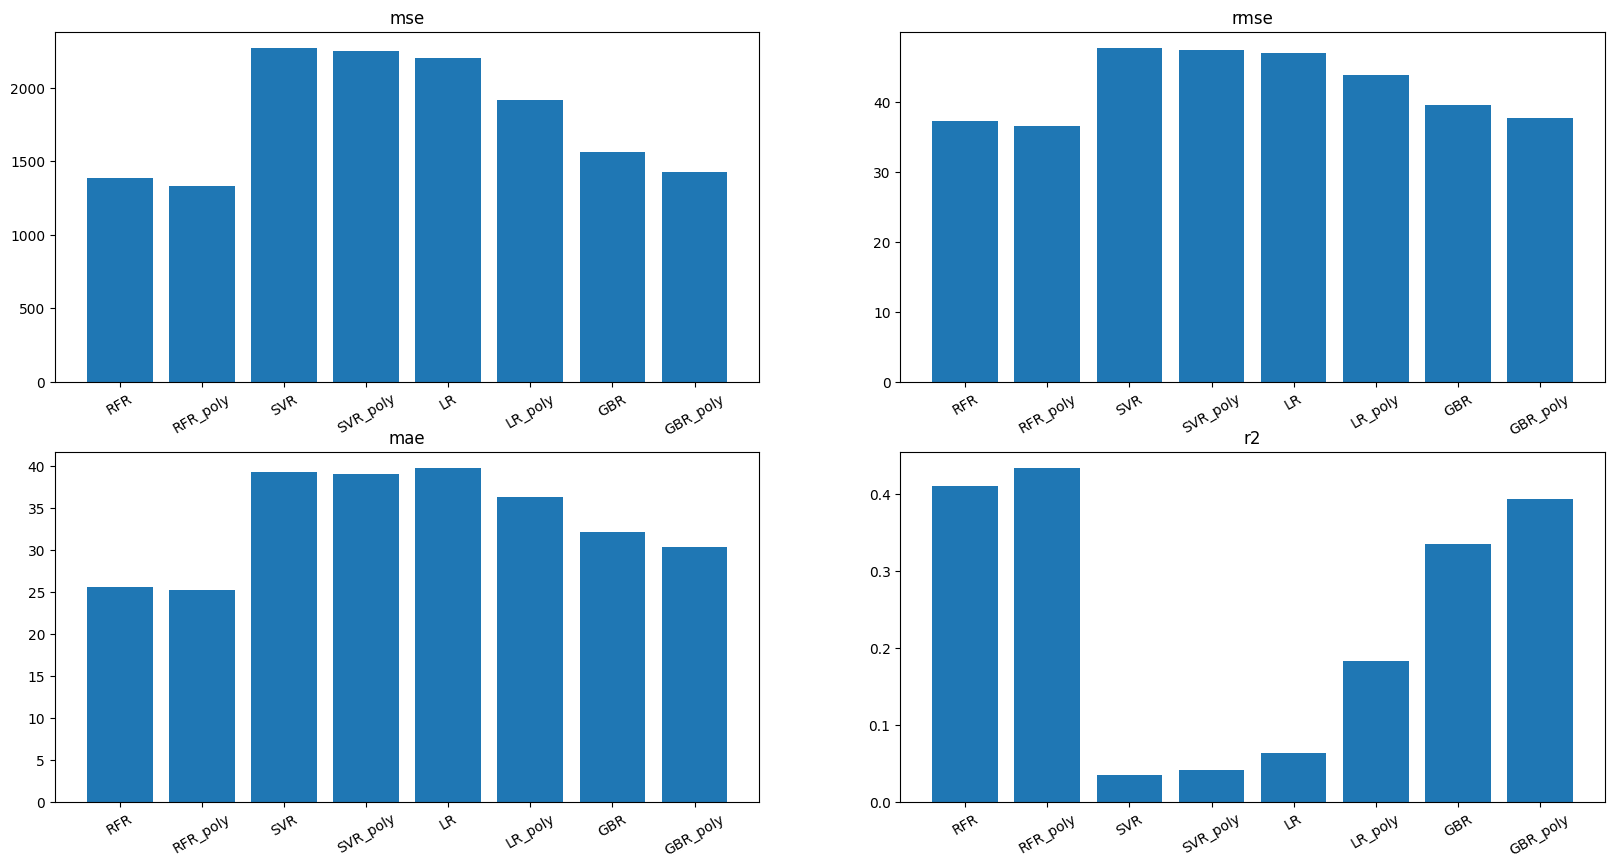

In [7]:
# visualize the metrics of each model
import matplotlib.pyplot as plt
import seaborn as sns

model_names = ['RFR', 'RFR_poly', 'SVR', 'SVR_poly', 'LR', 'LR_poly', 'GBR', 'GBR_poly']
mse = [rfr_mse, rfr_poly_mse, svr_mse, svr_poly_mse, lr_mse, lr_poly_mse, gbr_mse, gbr_poly_mse]
rmse = [rfr_rmse, rfr_poly_rmse, svr_rmse, svr_poly_rmse, lr_rmse, lr_poly_rmse, gbr_rmse, gbr_poly_rmse]
mae = [rfr_mae, rfr_poly_mae, svr_mae, svr_poly_mae, lr_mae, lr_poly_mae, gbr_mae, gbr_poly_mae]
r2 = [rfr_r2, rfr_poly_r2, svr_r2, svr_poly_r2, lr_r2, lr_poly_r2, gbr_r2, gbr_poly_r2]

# spilt them into use and not use poly
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.bar(model_names, mse)
plt.xticks(rotation=30)
plt.title('mse')
plt.subplot(2,2,2)
plt.bar(model_names, rmse)
plt.xticks(rotation=30)
plt.title('rmse')
plt.subplot(2,2,3)
plt.bar(model_names, mae)
plt.xticks(rotation=30)
plt.title('mae')
plt.subplot(2,2,4)
plt.bar(model_names, r2)
plt.xticks(rotation=30)
plt.title('r2')
plt.show()



In [8]:
# # therefore, we select GBR as the base model
# from sklearn.ensemble import GradientBoostingRegressor
# # draw the loss curve during training
# from sklearn.model_selection import learning_curve

# GBR = GradientBoostingRegressor(loss='huber',learning_rate=0.08)
# train_sizes, train_scores, test_scores = learning_curve(GBR, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1,1,10), verbose=1)
# train_scores_mean = -train_scores.mean(axis=1)
# test_scores_mean = -test_scores.mean(axis=1)
# plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training')
# plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation')
# plt.legend()
# plt.show()

# # draw the learning curve during training
# from sklearn.model_selection import validation_curve

# param_range = np.linspace(0.01,0.2,10)
# train_scores, test_scores = validation_curve(GBR, X_train, y_train, cv=5, param_name='learning_rate', param_range=param_range, scoring='neg_mean_squared_error', verbose=1)
# train_scores_mean = -train_scores.mean(axis=1)
# test_scores_mean = -test_scores.mean(axis=1)
# plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training')

# plt.plot(param_range, test_scores_mean, 'o-', color='g', label='Cross-validation')
# plt.legend()
# plt.show()

In [9]:
from sklearn import preprocessing
# only use x
GBR = GradientBoostingRegressor(loss='huber',learning_rate=0.2)
scaler = preprocessing.StandardScaler()
X_train_x = scaler.fit_transform(X_train_x.reshape(-1,1))
X_test_x = scaler.transform(X_test_x.reshape(-1,1))
GBR.fit(X_train_x,y_train_x)
y_pred = GBR.predict(X_test_x)
gbr_mse, gbr_rmse, gbr_mae, gbr_r2 = evaluate_regression(y_test_x, y_pred)
print('[GBR only x]')
print('mse: ', gbr_mse)
print('rmse: ', gbr_rmse)
print('mae: ', gbr_mae)
print('r2: ', gbr_r2)

# only use y
GBR = GradientBoostingRegressor(loss='huber',learning_rate=0.2)
scaler = preprocessing.StandardScaler()
X_train_y = scaler.fit_transform(X_train_y.reshape(-1,1))
X_test_y = scaler.transform(X_test_y.reshape(-1,1))
GBR.fit(X_train_y,y_train_y)
y_pred = GBR.predict(X_test_y)
gbr_mse, gbr_rmse, gbr_mae, gbr_r2 = evaluate_regression(y_test_y, y_pred)
print('[GBR only y]')
print('mse: ', gbr_mse)
print('rmse: ', gbr_rmse)
print('mae: ', gbr_mae)
print('r2: ', gbr_r2)

# use both x and y
GBR = GradientBoostingRegressor(loss='huber',learning_rate=0.2)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
GBR.fit(X_train,y_train)
y_pred = GBR.predict(X_test)
gbr_mse, gbr_rmse, gbr_mae, gbr_r2 = evaluate_regression(y_test, y_pred)
print('[GBR x and y]')
print('mse: ', gbr_mse)
print('rmse: ', gbr_rmse)
print('mae: ', gbr_mae)
print('r2: ', gbr_r2)


[GBR only x]
mse:  2042.469623621415
rmse:  45.19369008635403
mae:  37.233755850595664
r2:  0.12994630888121173
[GBR only y]
mse:  2014.5454020903176
rmse:  44.88368748320839
mae:  37.46315659488776
r2:  0.14184150268667584
[GBR x and y]
mse:  1481.3475316979316
rmse:  38.488277847910155
mae:  30.259895286464552
r2:  0.3689737791555089


In [12]:
# # random save only 5000 columns of data
# import pandas as pd
# import numpy as np
# import random
# import os

# path = '/home/ghosnp/project/fix_space/origin/carla_dataset_tools/raw_data/all_data.csv'
# df = pd.read_csv(path)
# df = df.sample(n=5000)
# df.to_csv('/home/ghosnp/project/fix_space/origin/carla_dataset_tools/raw_data/all_data_5000.csv', index=False)

[GBR x and y] test on train dataset
mse:  1431.79089279056
rmse:  37.83901284112153
mae:  28.849286332703773
r2:  0.5556786887418902
[GBR x and y] test on test dataset
mse:  1500.9486198055974
rmse:  38.742078155483576
mae:  29.762901342329002
r2:  0.5251098180371689


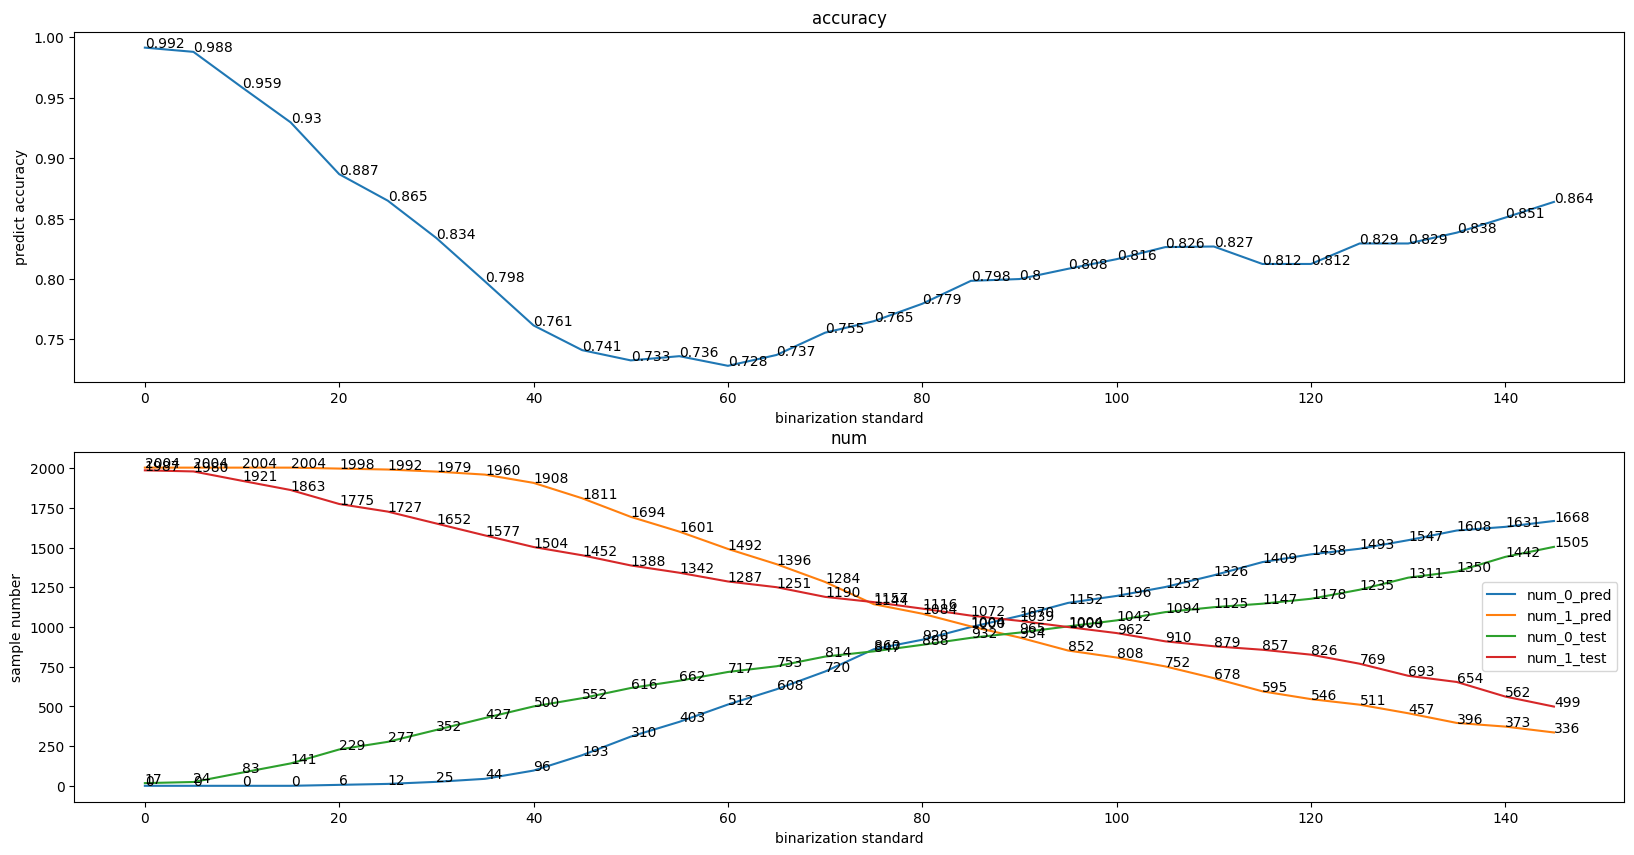

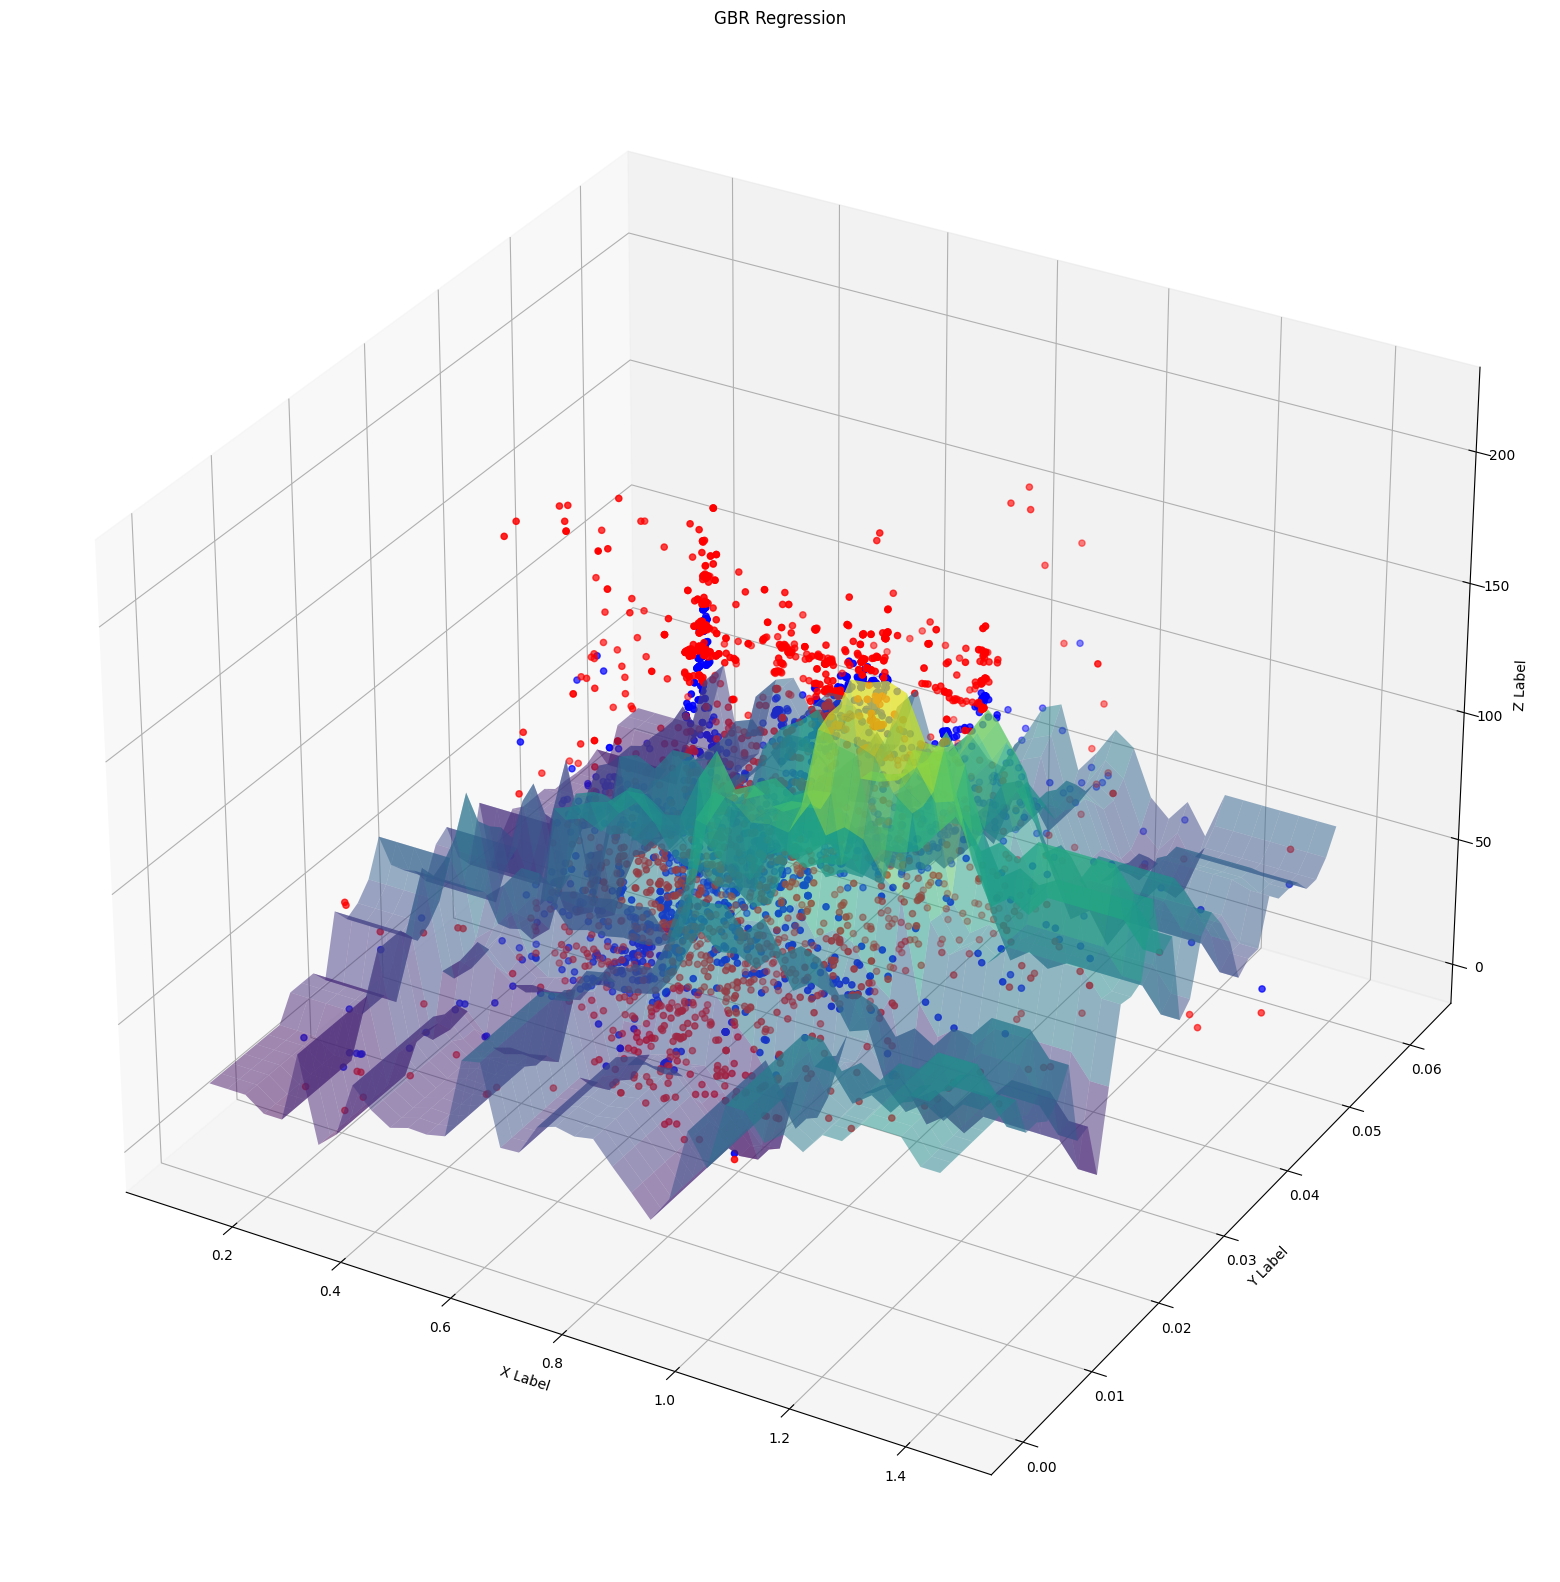

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
def z_standrand_scaler( y_pred, y_test):
    # make a table to show the accuracy, number of 0 and 1 in y_pred and y_test
    accuracys = []
    num_0_pred = []
    num_1_pred = []
    num_0_test = []
    num_1_test = []
    per = np.arange(0, 150, 5)
    for standard in per:
        y_pred2 = y_pred.copy()
        y_test2 = y_test.copy()
        y_pred2[y_pred2 <= standard] = 0
        y_pred2[y_pred2 > standard] = 1
        y_test2[y_test2 <= standard] = 0
        y_test2[y_test2 > standard] = 1
        accuracy = np.sum(y_pred2 == y_test2) / len(y_test2)
        accuracys.append(accuracy)
        num_0_pred.append(np.sum(y_pred2 == 0))
        num_1_pred.append(np.sum(y_pred2 == 1))
        num_0_test.append(np.sum(y_test2 == 0))
        num_1_test.append(np.sum(y_test2 == 1))

    # data = {'standard': per, 'accuracy': accuracys, 'num_0_pred': num_0_pred, 'num_1_pred': num_1_pred, 'num_0_test': num_0_test, 'num_1_test': num_1_test}
    # df = pd.DataFrame(data)
    # df = df[['standard', 'accuracy', 'num_0_pred', 'num_0_test', 'num_1_pred','num_1_test']]
    # print(df)

    # draw the accuracy curve
    plt.figure(figsize=(20,10))
    plt.subplot(2,1,1)
    plt.plot(per, accuracys)
    plt.title('accuracy')
    plt.xlabel('binarization standard')
    plt.ylabel('predict accuracy')
    for i in range(len(per)):
        plt.text(per[i], accuracys[i], str(round(accuracys[i], 3)))

    plt.subplot(2,1,2)
    # draw 0 and 1 in one figure
    plt.plot(per, num_0_pred, label='num_0_pred')
    plt.plot(per, num_1_pred, label='num_1_pred')
    plt.plot(per, num_0_test, label='num_0_test')
    plt.plot(per, num_1_test, label='num_1_test')
    plt.xlabel('binarization standard')
    plt.ylabel('sample number')
    # text the accuracy of each point
    for i in range(len(per)):
        # plt.text(per[i], num_1_pred[i], str(round(accuracys[i], 3)))
        plt.text(per[i], num_0_pred[i], str(round(num_0_pred[i], 3)))
        plt.text(per[i], num_1_pred[i], str(round(num_1_pred[i], 3)))
        plt.text(per[i], num_0_test[i], str(round(num_0_test[i], 3)))
        plt.text(per[i], num_1_test[i], str(round(num_1_test[i], 3)))

    plt.legend()
    plt.title('num')
    plt.show()

    return

def evaluate_regression(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, rmse, mae, r2


def test_on_local(filp,use):
    # path = '/home/ghosnp/dataset/self_l1/all_data.csv'
    path = '/home/ghosnp/project/fix_space/origin/carla_dataset_tools/raw_data/all_data.csv'
    df = pd.read_csv(path)
    X_train = np.array([df['x'],df['y']]).T
    y_train = np.array(df['z'])

    if use:
        index = np.where(y_train > filp)
        X_train = np.concatenate((X_train, X_train[index]), axis=0)
        y_train = np.concatenate((y_train, y_train[index]), axis=0)

        index = np.where(y_train > 160)
        X_train = np.concatenate((X_train, X_train[index]), axis=0)
        y_train = np.concatenate((y_train, y_train[index]), axis=0)


    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

    gbr = GradientBoostingRegressor(loss='huber',learning_rate=0.2)
    gbr.fit(X_train,y_train)
    y_pred = gbr.predict(X_train)
    gbr_mse, gbr_rmse, gbr_mae, gbr_r2 = evaluate_regression(y_train, y_pred)
    print('[GBR x and y] test on train dataset')
    print('mse: ', gbr_mse)
    print('rmse: ', gbr_rmse)
    print('mae: ', gbr_mae)
    print('r2: ', gbr_r2)

    y_pred = gbr.predict(X_test)
    gbr_mse, gbr_rmse, gbr_mae, gbr_r2 = evaluate_regression(y_test, y_pred)
    print('[GBR x and y] test on test dataset')
    print('mse: ', gbr_mse)
    print('rmse: ', gbr_rmse)
    print('mae: ', gbr_mae)
    print('r2: ', gbr_r2)

    z_standrand_scaler(y_pred, y_test)

    # vis the test data and curve in 3D

    #生成网格点
    X, Y = np.meshgrid(np.linspace(0.1, 1.4, 40), np.linspace(0, 0.06, 40))
    # X, Y = np.meshgrid(np.linspace(-1.1, 1.1, 30), np.linspace(-4.0, -1.9, 30))
    Z = gbr.predict(np.column_stack((X.ravel(), Y.ravel())))
    Z = Z.reshape(X.shape)
    # Z[Z <= 0] = np.nan
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111, projection='3d')

    # ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r', marker='o')
    ax.scatter(X_test[:,0], X_test[:,1], y_test, c='r', marker='o')
    ax.scatter(X_test[:,0], X_test[:,1], y_pred, c='b', marker='o')
 
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title('GBR Regression')
    ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.5)
    plt.show()

test_on_local(120,True)

In [15]:
import copent
from numpy.random import multivariate_normal as mnorm
from scipy.stats import spearmanr
x = X_train[:,0]
y = X_train[:,1]
z = y_train

# nonlinear correlation: copula entropy
# random individual distribution
print("random individual distribution")
random_x = np.random.rand(5000)
random_y = np.random.rand(5000)
random_z = np.random.rand(5000)
ce_test = np.array([random_x[:],random_y[:]]).T
random_xy = copent.copent(ce_test)
ce_test = np.array([random_x[:],random_z[:]]).T
random_xz = copent.copent(ce_test)
ce_test = np.array([random_y[:],random_z[:]]).T
random_yz = copent.copent(ce_test)
ce_test = np.array([random_x[:],random_y[:],random_z[:]]).T
random_xyz = copent.copent(ce_test)

# make data, z = x + y
print("z = x + 3 * y")
x2 = np.random.rand(5000)
y2 = np.random.rand(5000)
z2 = x2 + 3 * y2
ce_test = np.array([x2[:],y2[:]]).T
times_xy = copent.copent(ce_test)
ce_test = np.array([x2[:],z2[:]]).T
times_xz = copent.copent(ce_test)
ce_test = np.array([y2[:],z2[:]]).T
times_yz = copent.copent(ce_test)
ce_test = np.array([x2[:],y2[:],z2[:]]).T
times_xyz = copent.copent(ce_test)

# make data, z = x^2 + y^2 + sqrt(x + y)
print("z = x^2 + y^2 + sqrt(x + y)")
x2 = np.random.rand(5000)
y2 = np.random.rand(5000)
z2 = x2**2 + y2**2 + np.sqrt(x2 + y2)
ce_test = np.array([x2[:],y2[:]]).T
square_xy = copent.copent(ce_test)
ce_test = np.array([x2[:],z2[:]]).T
square_xz = copent.copent(ce_test)
ce_test = np.array([y2[:],z2[:]]).T
square_yz = copent.copent(ce_test)
ce_test = np.array([x2[:],y2[:],z2[:]]).T
square_xyz = copent.copent(ce_test)

# scene entropy - scene score
print("scene entropy - scene score")
ce_test = np.array([x[:],y[:]]).T
scene_xy = copent.copent(ce_test)
ce_test = np.array([x[:],z[:]]).T
scene_xz = copent.copent(ce_test)
ce_test = np.array([y[:],z[:]]).T
scene_yz = copent.copent(ce_test)
ce_test = np.array([x[:],y[:],z[:]]).T
scene_xyz = copent.copent(ce_test)

# normal distribution
print("normal distribution")
mu = np.array([0, 0, 0])
sigma = np.array([[1, 0.5, 0.5], [0.5, 1, 0.5], [0.5, 0.5, 1]])
data = mnorm(mu, sigma, 5000)
nx = data[:,0]
ny = data[:,1]
nz = data[:,2]
ce_test = np.array([nx[:],ny[:]]).T
normal_xy = copent.copent(ce_test)
ce_test = np.array([nx[:],nz[:]]).T
normal_xz = copent.copent(ce_test)
ce_test = np.array([ny[:],nz[:]]).T
normal_yz = copent.copent(ce_test)
ce_test = np.array([nx[:],ny[:],nz[:]]).T
normal_xyz = copent.copent(ce_test)

random individual distribution
z = x + 3 * y
z = x^2 + y^2 + sqrt(x + y)
scene entropy - scene score
normal distribution


In [16]:
from pandas import DataFrame

data = {'random individual': [random_xy, random_xz, random_yz, random_xyz],
        'z=x+3y': [times_xy, times_xz, times_yz, times_xyz],
        'z=x^2+y^2+sqrt(x+y)': [square_xy, square_xz, square_yz, square_xyz],
        'scene entropy': [scene_xy, scene_xz, scene_yz, scene_xyz],
        'normal distribution': [normal_xy, normal_xz, normal_yz, normal_xyz]}
df = DataFrame(data, index=['xy', 'xz', 'yz', 'xyz']).T
print(df)


                           xy        xz        yz       xyz
random individual   -0.017641 -0.041881 -0.009450 -0.092468
z=x+3y              -0.044352  0.135735  1.221024  3.616565
z=x^2+y^2+sqrt(x+y) -0.032435  0.517477  0.502255  3.540958
scene entropy        0.781758  0.642287  0.659491  1.874556
normal distribution  0.146944  0.114051  0.126322  0.287540


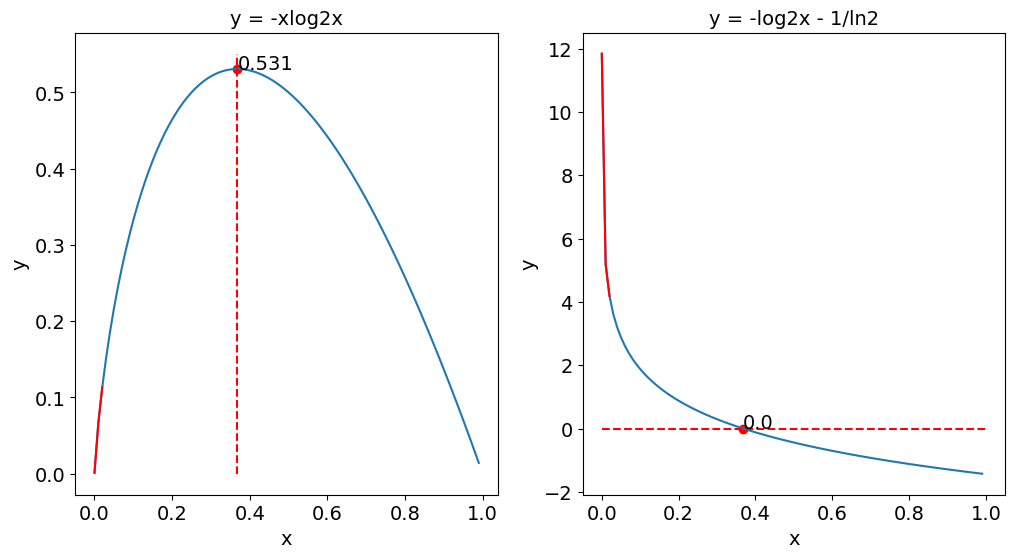

In [11]:
# draw y = -xlog2x, and show the max point
import numpy as np
import matplotlib.pyplot as plt

t = 1/np.exp(1)
x = np.arange(0.0001, 1, 0.01)
y = -x * np.log2(x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plot first figure
ax1.plot(x, y)
ax1.scatter(t, -t * np.log2(t), c='r')
ax1.text(t, -t * np.log2(t), str(round(-t * np.log2(t), 3)),fontsize=14)
ax1.plot([t, t], [0, -t * np.log2(t)+0.02], 'r--')
ax1.set_title('y = -xlog2x',fontsize=14)
ax1.set_xlabel('x',fontsize=14)
ax1.set_ylabel('y',fontsize=14)
# highlight the curve when x < 0.05
ax1.plot(x[x < 0.03], y[x < 0.03], 'r')
ax1.tick_params(axis='both', which='major', labelsize=14)

# plot second figure
y = -np.log2(x) - 1/np.log(2)
ax2.plot(x, y)
ax2.scatter(t, -np.log2(t) - 1/np.log(2), c='r')
ax2.text(t, -np.log2(t) - 1/np.log(2), str(round(-np.log2(t) - 1/np.log(2), 3)),fontsize=14)
ax2.plot([0, 1], [0, 0], 'r--')
ax2.set_title('y = -log2x - 1/ln2',fontsize=14)
ax2.set_xlabel('x',fontsize=14)
ax2.set_ylabel('y',fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.plot(x[x < 0.03], y[x < 0.03], 'r')

plt.savefig('xlogx.pdf')
plt.show()


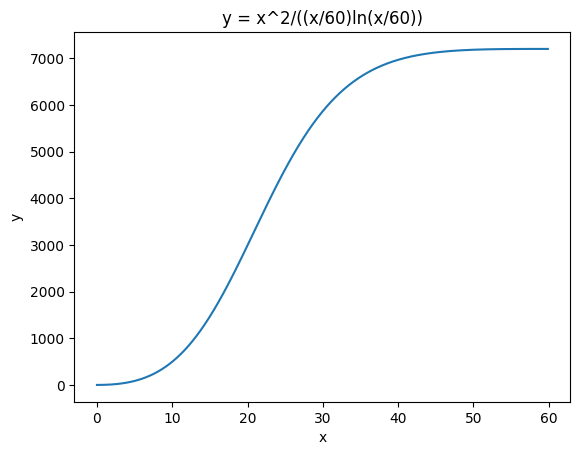

In [23]:
# draw function y = x^2/((x/60)ln(x/60))
import numpy as np

x = np.arange(0.0001, 60, 0.1)
y = x**2 / ((x/60)*np.log(x/60)+0.5)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x^2/((x/60)ln(x/60))')

plt.show()

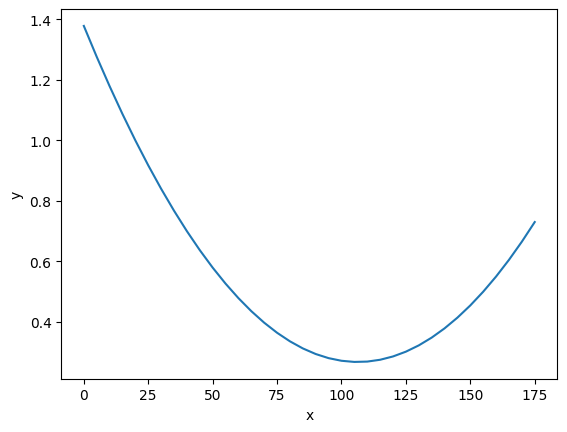

In [26]:
# draw y =   0.00009821428571428572x**2+ -0.020892857142857144x+   1.3785714285714286
import numpy as np

x = np.arange(0, 180, 5)
y = 0.00009821428571428572*x**2+ -0.020892857142857144*x+   1.3785714285714286

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')

plt.show()
